<a href="https://colab.research.google.com/github/ktichola/ML-and-DL-to-Gravitational-waves-analysis/blob/main/%CE%91%CE%BD%CF%84%CE%AF%CE%B3%CF%81%CE%B1%CF%86%CE%BF_Machine_Learning_applied_to_Physics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'predicting-pulsar-starintermediate:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F845444%2F1442600%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240505%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240505T104559Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D9fd3fb43ecdb3f3bbefa43c1aa9dd6adef8bfa134ab8015195c7ee00e27a8476bcbdc6dff5363cb0eff2cc15342a87b0cb13808ceedf2c7d8e7a898cb9353be66603f1e1d4897479ba66562d4c4d49a98a163250fb261a34497ff529c1bcbc55d78c27eae8a7db780bcb0384437d94d04f16c4fee9cfb9ebb584ee52c50494399d0e83590b06a1d0166ddac82464721e53de4a1b29ee952182c784c06f1b0ed355ffdecdb401130c648bb3d837dd343f44716eacaf7e3553497b5cd4d463afa7375a307340ce2b27b615cbaa5029b47195989573102ce9526e28be242e57832a79f35c7b2c3838164d6ae9db1ad90eb8223cd3ba61269d05a57ec2776c85d963,cern-electron-collision-data:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1058964%2F1781197%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240505%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240505T104559Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D2f7b15299df09872ac78bdd0b24c90a9c953ce08aefb34da60e602067133bc2f7d8e355f61eb23d49493ebf97717b10cbfb119f5dfff50f2d2ad178d8e3f837d2ef645ef1a25b4781bd6c8b633a43dd84e3c927f27162b045942f4bec8957e9fa84706d8de4b6d606bd3e2b01ef5683c983128647ba02aaf86a16f1039d9c5365377bdfe894c51f8c28b0a05c1314011fac0b3cb90074ef6a9db171f741a565482d00cf8af726a96d5c2ce5cf6468d120434723f9392a2ab47573f897b853740a756f0acc5dd64f8ef0128756dffcb2320c48bb56eff054998af8888fb84966426e512ea83b9e558026cd9097241bd0fc53a51a08a72db899218c058a7ae7e64'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
import matplotlib.pyplot as plt #library for visualization
import seaborn as sns # wrapper library for visualization
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/cern-electron-collision-data/dielectron.csv
/kaggle/input/predicting-pulsar-starintermediate/pulsar_data_train.csv
/kaggle/input/predicting-pulsar-starintermediate/pulsar_data_test.csv


NOTAS GENERALES:
1 escalar los datos? https://www.kaggle.com/code/tanushri98/predicting-a-pulsar-star
    no es necesario, solo algunos lo hacen

Input data files are available in the read-only "../input/" directory
For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

> # 1. Analisis de Datos

primero cargamos los datos y los analizamos, los primeros 5 valores con .head() y diversas estadisticas con .describe()

In [ ]:

pulsar_datatest_path='../input/predicting-pulsar-starintermediate/pulsar_data_train.csv'
pulsar_datatrain_path = '../input/predicting-pulsar-starintermediate/pulsar_data_test.csv'
train_set=pd.read_csv(pulsar_datatest_path)
test_set=pd.read_csv(pulsar_datatrain_path)

train_set.head()


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [ ]:
original_columns = train_set.columns
new_columns = ['mean_profile', 'std_profile', 'kurtosis_profile', 'skewness_profile', 'mean_dmsnr',
               'std_dmsnr', 'kurtosis_dmsnr', 'skewness_dmsnr', 'target']
train_set.columns=new_columns
test_set.columns = new_columns

train_set.describe()


,mean_profile,std_profile,kurtosis_profile,skewness_profile,mean_dmsnr,std_dmsnr,kurtosis_dmsnr,skewness_dmsnr,target
count,12528.000000,12528.000000,10793.000000,12528.000000,12528.000000,11350.000000,12528.000000,11903.000000,12528.000000
mean,111.041841,46.521437,0.478548,1.778431,12.674758,26.351318,8.333489,105.525779,0.092034
std,25.672828,6.801077,1.064708,6.208450,29.613230,19.610842,4.535783,107.399585,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.024652,-0.188142,1.910535,14.404353,5.803063,35.199899,0.000000
50%,115.183594,46.931022,0.223678,0.203317,2.792642,18.412402,8.451097,83.126301,0.000000
75%,127.109375,50.979103,0.473125,0.932374,5.413253,28.337418,10.727927,139.997850,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


In [ ]:
test_set.head()

,mean_profile,std_profile,kurtosis_profile,skewness_profile,mean_dmsnr,std_dmsnr,kurtosis_dmsnr,skewness_dmsnr,target
0,116.906250,48.920605,0.186046,-0.129815,3.037625,17.737102,8.122621,78.813405,NaN
1,75.585938,34.386254,2.025498,8.652913,3.765050,21.897049,7.048189,55.878791,NaN
2,103.273438,46.996628,0.504295,0.821088,2.244983,15.622566,9.330498,105.134941,NaN
3,101.078125,48.587487,1.011427,1.151870,81.887960,81.464136,0.485105,-1.117904,NaN
4,113.226562,48.608804,0.291538,0.292120,6.291806,26.585056,4.540138,21.708268,NaN


In [ ]:
test_set.describe()

,mean_profile,std_profile,kurtosis_profile,skewness_profile,mean_dmsnr,std_dmsnr,kurtosis_dmsnr,skewness_dmsnr,target
count,5370.000000,5370.000000,4603.000000,5370.000000,5370.000000,4846.000000,5370.000000,5126.000000,0.0
mean,111.168917,46.615074,0.483676,1.751260,12.473587,26.425371,8.233724,102.869088,NaN
std,25.608635,6.940638,1.076893,6.072820,29.145134,19.384489,4.435683,104.748418,NaN
min,6.179688,24.791612,-1.876011,-1.764717,0.213211,7.370432,-2.721857,-1.964998,NaN
25%,101.041016,42.408020,0.030643,-0.189557,1.956522,14.555826,5.700461,33.817330,NaN
50%,114.757812,47.031304,0.227314,0.186468,2.830686,18.549670,8.383695,81.392046,NaN
75%,127.023438,51.133444,0.475056,0.918807,5.590301,28.681787,10.632265,136.893502,NaN
max,192.617188,98.778911,7.608370,65.385974,223.392141,109.712649,34.539844,1191.000837,NaN


Ahora definimos cuales son los valores que queremos averiguar y cuales son los que usaremos para el analisis

vamos a ver cuantos valores nulos tenemos en cada columna

In [ ]:
train_set.isnull().sum()

mean_profile           0
std_profile            0
kurtosis_profile    1735
skewness_profile       0
mean_dmsnr             0
std_dmsnr           1178
kurtosis_dmsnr         0
skewness_dmsnr       625
target                 0
dtype: int64

ahora vwemos el porcentaje de valores desconocidos

In [ ]:
train_set.isnull().sum()/len(train_set) * 100

mean_profile         0.000000
std_profile          0.000000
kurtosis_profile    13.848978
skewness_profile     0.000000
mean_dmsnr           0.000000
std_dmsnr            9.402937
kurtosis_dmsnr       0.000000
skewness_dmsnr       4.988825
target               0.000000
dtype: float64

In [ ]:
test_set.isnull().sum()

mean_profile           0
std_profile            0
kurtosis_profile     767
skewness_profile       0
mean_dmsnr             0
std_dmsnr            524
kurtosis_dmsnr         0
skewness_dmsnr       244
target              5370
dtype: int64

In [ ]:
test_set.isnull().sum()/len(test_set) * 100

mean_profile          0.000000
std_profile           0.000000
kurtosis_profile     14.283054
skewness_profile      0.000000
mean_dmsnr            0.000000
std_dmsnr             9.757914
kurtosis_dmsnr        0.000000
skewness_dmsnr        4.543762
target              100.000000
dtype: float64

In [ ]:
print(len(train_set))
print(len(test_set))

12528
5370


Si faltan muchos valores es mejor quitar la columna porque daria resultados imprecisos, si faltan pocos y quitamos la
columna, perdemos informacion importante.

Esto es un problema que debe analizarse detenidamente porque depende de otros diversos factores de la obtencion y significado de los datos, cada caso es distinto y debe abordarse de una forma independiente

En este caso primero vamos a probar modificando los valores faltantes primero mediante imputacion. Más adelante, veremos que es posible quitar algunas columnas (no siempre) mediante un analisis de correlación

In [ ]:
cols_with_missing = [col for col in train_set.columns
                     if train_set[col].isnull().any()]
print(cols_with_missing)

['kurtosis_profile', 'std_dmsnr', 'skewness_dmsnr']


> # Imputación

ahora usamos SimpleImputer para solventar el problema de los valores faltantes, SimpleImputer usa diversas estrategias
If “mean”, then replace missing values using the mean along each column. Can only be used with numeric data.

If “median”, then replace missing values using the median along each column. Can only be used with numeric data.

If “most_frequent”, then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.

If “constant”, then replace missing values with fill_value. Can be used with strings or numeric data.

nosotros usaremos el valor por defecto, mean, media.

No es exacto pero es mejor que eliminar esa información

In [ ]:
my_imputer = SimpleImputer()
train_imputed = pd.DataFrame(my_imputer.fit_transform(train_set))
# Imputation removed column names; put them back
train_imputed.columns = train_set.columns
test_set_imputed = test_set.fillna(test_set.median())
test_set_imputed.isnull().sum()


mean_profile           0
std_profile            0
kurtosis_profile       0
skewness_profile       0
mean_dmsnr             0
std_dmsnr              0
kurtosis_dmsnr         0
skewness_dmsnr         0
target              5370
dtype: int64

In [ ]:
train_imputed.isnull().sum()

mean_profile        0
std_profile         0
kurtosis_profile    0
skewness_profile    0
mean_dmsnr          0
std_dmsnr           0
kurtosis_dmsnr      0
skewness_dmsnr      0
target              0
dtype: int64

para solventar los valores faltantes del test set, los subtituimos rapidamente con fillna ya que asi nos ahorramos tener que dividir el set por separado y arreglar los valores de todas las columnas menos la objetivo y luego volver a unirlo en un solo set, ya que al faltat todos los valores de la variable objetivo tenemos problemas con la imputacion

Debemos separar el set de entrenamiento en dos sets, uno que será el que usaremos para entrenar y otro para validar que nuestras predicciones son correctas

In [ ]:
train_set_features=['mean_profile', 'std_profile', 'kurtosis_profile', 'skewness_profile', 'mean_dmsnr',
                    'std_dmsnr', 'kurtosis_dmsnr', 'skewness_dmsnr']


y=train_set.target
X_full=train_imputed[train_set_features]
X_test_full=test_set_imputed[train_set_features]

# Break off validation set from training data
imputed_X_train, imputed_X_valid, y_train, y_valid = train_test_split(X_full, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)


In [ ]:
""""
train_set_features=['mean_profile', 'std_profile', 'kurtosis_profile', 'skewness_profile', 'mean_dmsnr',
               'std_dmsnr', 'kurtosis_dmsnr', 'skewness_dmsnr']


y=train_set.target
X_full=train_set[train_set_features]
X_test_full=test_set[train_set_features]

# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X_full, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)
"""


'"\ntrain_set_features=[\'mean_profile\', \'std_profile\', \'kurtosis_profile\', \'skewness_profile\', \'mean_dmsnr\',\n               \'std_dmsnr\', \'kurtosis_dmsnr\', \'skewness_dmsnr\']\n\n\ny=train_set.target\nX_full=train_set[train_set_features]\nX_test_full=test_set[train_set_features]\n\n# Break off validation set from training data\nX_train, X_valid, y_train, y_valid = train_test_split(X_full, y, train_size=0.8, test_size=0.2,\n                                                      random_state=0)\n'

In [ ]:
"""
from sklearn.impute import SimpleImputer

# Imputation
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid))

test_set = test_set.fillna(test_set.median())
X_test_full=test_set[train_set_features]

# Imputation removed column names; put them back
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns
"""

'\nfrom sklearn.impute import SimpleImputer\n\n# Imputation\nmy_imputer = SimpleImputer()\nimputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))\nimputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid))\n\ntest_set = test_set.fillna(test_set.median())\nX_test_full=test_set[train_set_features]\n\n# Imputation removed column names; put them back\nimputed_X_train.columns = X_train.columns\nimputed_X_valid.columns = X_valid.columns\n'

In [ ]:
test_set_imputed.isnull().sum()

mean_profile           0
std_profile            0
kurtosis_profile       0
skewness_profile       0
mean_dmsnr             0
std_dmsnr              0
kurtosis_dmsnr         0
skewness_dmsnr         0
target              5370
dtype: int64

In [ ]:
X_test_full.isnull().sum()

mean_profile        0
std_profile         0
kurtosis_profile    0
skewness_profile    0
mean_dmsnr          0
std_dmsnr           0
kurtosis_dmsnr      0
skewness_dmsnr      0
dtype: int64

Para hacer el modelo necesitamos seleccionar la caracteristica que queremos analizar, en este caso si es pulsar o no. Eso se asigna a una variable "y".

In [ ]:
y_t=test_set.target
y_t.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: target, dtype: float64

 >  # Analisis de correlacion


Un analisis de correlacion es interesante para reducir las dimensiones del problema. El algoritmo de correlacion analiza dependencia entre las distintas variables y si la modificacion de sus valores siguen la misma tendencia. Un alto grado de correlación entre dos variables puede ser utilizado para eliminar una de estas del problema y simplificar el proceso

In [ ]:

train_impute_out = train_imputed.copy()
train_impute_out.columns =original_columns

<AxesSubplot:>

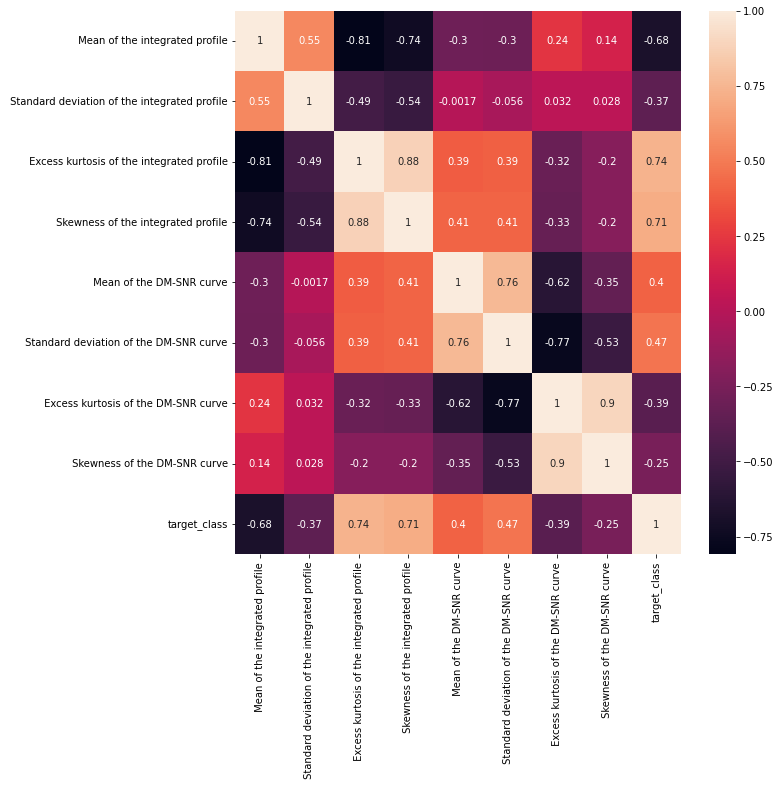

In [ ]:
plt.figure(figsize = (10, 10))
corr_mat = train_impute_out.corr()
sns.heatmap(corr_mat, xticklabels = corr_mat.columns, yticklabels = corr_mat.columns, annot=True)

Vemos que el exceso de Kurtosis y Skewnesccuve están altamente correlacionadas (90 por cierto para DM-SNR y 88 porciento para IP "integrated profile"). tambien sus correlaciones con otras caracteristicas son bastante similares ( 10% de diferencia como maximo) or lo que podemos sacar fuera cualquiere de estas. También, la media y la desvicion estandar de la curva DM-SNR están altamente correlacionadas. Entones tambien podemos sacar cualquiera de ellas.

Sin embargo, el exceso de kurtosis del perfil integrado, Skewness de la curva DM-SNR y la desviacion estandar de la curva DM-SNR tenian valores faltantes.

Tambien skewness del perfil integrado y de la curva DM-SNR y la dsviacion estandar de la curva DM_SNR tenian mas valores faltantes que el excesos de kurtosis de la curva DM-SNR

Por lo tanto skewness y la desviacion estandar de la curva DM_SNR se sacan fuera. También el exceso de kurtosis tenia un 13% de valores faltantes (comparado con el 2 % de diferencia en outliers) por lo que el excesos de krtosis del perfil integrado es descartado

Primero probaremos nuestro modelo con todas las variables y despues dejando fuera las variables mencionadas para comprobar que efectivamente obtenemos resultados similares

In [ ]:
train_impute_out.columns= new_columns
train_reduced=train_impute_out.drop(['kurtosis_profile', 'skewness_dmsnr', 'std_dmsnr'], axis=1)
X_test_reduced =X_test_full.drop(['kurtosis_profile', 'skewness_dmsnr', 'std_dmsnr'], axis=1)
train_reduced.head()

,mean_profile,std_profile,skewness_profile,mean_dmsnr,kurtosis_dmsnr,target
0,121.156250,48.372971,-0.013165,3.168896,7.449874,0.0
1,76.968750,36.175557,3.388719,2.399666,9.414652,0.0
2,130.585938,53.229534,-0.297242,2.743311,8.508364,0.0
3,156.398438,48.865942,-0.171294,17.471572,2.958066,0.0
4,84.804688,36.117659,3.274125,2.790134,8.405008,0.0


In [ ]:
X_reduced=train_reduced.copy().drop(['target'], axis = 1)
reduced_X_train, reduced_X_valid, y_train, y_valid = train_test_split(X_reduced, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)
reduced_X_train.describe()

,mean_profile,std_profile,skewness_profile,mean_dmsnr,kurtosis_dmsnr
count,10022.000000,10022.000000,10022.000000,10022.000000,10022.000000
mean,110.898075,46.499521,1.824051,12.737285,8.334876
std,25.889200,6.816628,6.339983,29.642776,4.541962
min,5.812500,25.220056,-1.791886,0.213211,-3.139270
25%,100.689453,42.340422,-0.189301,1.908027,5.796353
50%,115.089844,46.907553,0.207993,2.791806,8.445792
75%,127.117188,50.984045,0.938228,5.446488,10.731481
max,189.734375,91.808628,68.101622,222.421405,34.539844


# decision tree clasifier

decision tree es una de las formas de predicción fundamentales. La forma de funcionar es creando un arbol de variables donde te vas desplazando de una rama a la siguiente según se cumplan determinadas caracteristicas. A continuacion un ejemplo para clasificar flores tal y como sale en el libro para hacernos una ideal visual

![image.png](attachment:07af31c7-c9ab-4948-beb6-837d75d5bf2c.png)

importantes ajustes que se pueden hacer

splitter{“best”, “random”}, default=”best”
The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

max_depth: int, default=None
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

In [ ]:
tree =  DecisionTreeClassifier()
tree.fit(imputed_X_train, y_train)

DecisionTreeClassifier()

In [ ]:
print(tree.score(imputed_X_train,y_train))
print(tree.score(imputed_X_valid,y_valid))

1.0
0.965682362330407


podemos cambiar la profundidad de las raices para obtener distinta puntuacion. Esto es el numero de verificaciones que se deben hacer antes de clasificar un determinado dato

In [ ]:
tree=DecisionTreeClassifier(max_depth=4)
tree.fit(imputed_X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [ ]:
print(tree.score(imputed_X_train,y_train))
print(tree.score(imputed_X_valid,y_valid))

0.978646976651367
0.975658419792498


In [ ]:
predicted_pulsars_tree = tree.predict(imputed_X_valid)
pulsars = predicted_pulsars_tree.tolist()
count = pulsars.count(1)
print('Count of pulsars:', count)

Count of pulsars: 182


In [ ]:
predicted_pulsars_test_tree=tree.predict(X_test_full)
pulsarstest = predicted_pulsars_test_tree.tolist()
count = pulsarstest.count(1)
print('Count of pulsars:', count)

Count of pulsars: 404


In [ ]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model =   DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, random_state=1)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [ ]:
for max_leaf_nodes in [2,4,5,10,20,50,500]:
    my_mae = get_mae(max_leaf_nodes,imputed_X_train,imputed_X_valid,y_train,y_valid)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %f" %(max_leaf_nodes, my_mae))

Max leaf nodes: 2  		 Mean Absolute Error:  0.034318
Max leaf nodes: 4  		 Mean Absolute Error:  0.024342
Max leaf nodes: 5  		 Mean Absolute Error:  0.024342
Max leaf nodes: 10  		 Mean Absolute Error:  0.024741
Max leaf nodes: 20  		 Mean Absolute Error:  0.025539
Max leaf nodes: 50  		 Mean Absolute Error:  0.027534
Max leaf nodes: 500  		 Mean Absolute Error:  0.032322


> **Overfiting and underfiting**



Decision trees nos dejan con una dificil decision. Si usamos un arbol muy profundo con multitud de ojas tendremos sobreajuste debido a que cada prediccion vendrá de ojas donde solo hay unos pequeña cantidad de datos, ya que todos se reparten demasiado entre las ojas. Pero un arbol superficial con pocas ojas tambien fucionará deficientemente debido a que falla al capturar muchas distinciones entre los datos.

Inclyso hoy, las tecnicas de modelaje mas sofisticadas enfrentan esta tensión entre underfitting y overfitting. Pero, muchos modelos tienen una idea clara que puede dar mejor resultado, el random forest.

El random forest usa multitud de arboles, y hace su prediccion promediando entre las predicciones que hace cada arbol. Esto generalemnte tiene una precisión de preddicion mayor que un simple arbol y funciona mejor si nos limitamos a los parametros por defecto sin hacer un ajuste de ellos. Es un modelo recomendable si no queremos meternos demasiado a tocar y modificar los parametros del modelo

![image.png](attachment:a323fc8c-086c-4ed7-90ba-a28ba595841b.png)

When we divide the houses amongst many leaves, we also have fewer houses in each leaf. Leaves with very few houses will make predictions that are quite close to those homes' actual values, but they may make very unreliable predictions for new data (because each prediction is based on only a few houses).

At an extreme, if a tree divides houses into only 2 or 4, each group still has a wide variety of houses. Resulting predictions may be far off for most houses, even in the training data (and it will be bad in validation too for the same reason). When a model fails to capture important distinctions and patterns in the data, so it performs poorly even in training data, that is called underfitting.

# RandomForestClassifier

podemos definir una función para obtener el error absoluto medio vaiando el maximo de profundidad permitida para cada arbol y encontrar la mejor opcion

In [ ]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model =  RandomForestClassifier(max_leaf_nodes=max_leaf_nodes, random_state=1)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [ ]:
for max_leaf_nodes in [2, 20, 5, 10]:
    my_mae = get_mae(max_leaf_nodes,imputed_X_train,imputed_X_valid,y_train,y_valid)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %f" %(max_leaf_nodes, my_mae))

Max leaf nodes: 2  		 Mean Absolute Error:  0.030726
Max leaf nodes: 20  		 Mean Absolute Error:  0.021149
Max leaf nodes: 5  		 Mean Absolute Error:  0.023144
Max leaf nodes: 10  		 Mean Absolute Error:  0.023144


In [ ]:
for max_leaf_nodes in [2,5, 20,50,500]:
    my_mae = get_mae(max_leaf_nodes,imputed_X_train,imputed_X_valid,y_train,y_valid)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %f" %(max_leaf_nodes, my_mae))

Max leaf nodes: 2  		 Mean Absolute Error:  0.030726
Max leaf nodes: 5  		 Mean Absolute Error:  0.023144
Max leaf nodes: 20  		 Mean Absolute Error:  0.021149
Max leaf nodes: 50  		 Mean Absolute Error:  0.019553
Max leaf nodes: 500  		 Mean Absolute Error:  0.019553


In [ ]:
candidate_max_leaf_nodes = [2,5, 20, 50, 500]
# Write loop to find the ideal tree size from candidate_max_leaf_nodes


    #mae_max=get_mae(5, train_X, val_X, train_y, val_y)

scores = {leaf_size: get_mae(max_leaf_nodes,imputed_X_train,imputed_X_valid,y_train,y_valid) for leaf_size in candidate_max_leaf_nodes}

# Store the best value of max_leaf_nodes (it will be either 5, 25, 50, 100, 250 or 500)
best_tree_size = min(scores, key=scores.get)
print(scores)
print(best_tree_size)

{2: 0.019553072625698324, 5: 0.019553072625698324, 20: 0.019553072625698324, 50: 0.019553072625698324, 500: 0.019553072625698324}
2


In [ ]:
# Define model
pulsar_model_RF = RandomForestClassifier(max_leaf_nodes=50, random_state=1)

# Fit model
pulsar_model_RF.fit(imputed_X_train, y_train)


RandomForestClassifier(max_leaf_nodes=50, random_state=1)

In [ ]:
predicted_pulsars_RF = pulsar_model_RF.predict(imputed_X_valid)
pulsars = predicted_pulsars_RF.tolist()
count = pulsars.count(1)
print('Count of pulsars:', count)

Count of pulsars: 190


In [ ]:
predicted_pulsars_RF_test=pulsar_model_RF.predict(X_test_full)
pulsarstest = predicted_pulsars_RF_test.tolist()
count = pulsarstest.count(1)
print('Count of pulsars:', count)

Count of pulsars: 422


# Confusion matrix:
la confusion matrix es una medida que se tiende a usar en clasificadores para analizar el grado de precisión. La idea general es contar el numero de veces que una entrada de clase A ha sido clasificada como clase B, para hacer la confusion matrix es necesario tener un set de preddiciones que podamos comparar con los targets reales. Esto ultimo tamboien es posible hacerlo con una funcion de validación cruzada "Cross Validation"

las filas representan la clase real
las columnas representan la clase asignada.
Por lo tanto los resultados correctos son los que encontramos la diagonal

el elemento 11 de la matrix representa los datos que fuero clasificados como no pulsares y efectivamente no lo son "TN"

12 representa los que fueron clasificados como pulsares y no lo son "FP"

21 representa los que fueron clasificados como no pulsares y son pulsares, "FN"

22 representa los que fueron clasificados como pulsares y son pulsares "TP"





![image.png](attachment:dccc8321-b56d-45cb-a3c6-647d279535ea.png)

![image.png](attachment:e38cc823-c0a9-4188-9161-f744859fde8d.png)

![image.png](attachment:8f8f2629-a948-4620-9e63-937e8e508a54.png)

![image.png](attachment:bf09de4e-9235-4b46-9bf2-b26d5150c114.png)

accuracy= 0.9804469273743017
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2285
         1.0       0.95      0.82      0.88       221

    accuracy                           0.98      2506
   macro avg       0.97      0.91      0.94      2506
weighted avg       0.98      0.98      0.98      2506



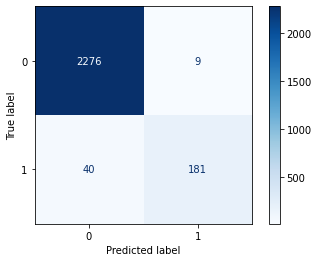

In [ ]:
print("accuracy=",accuracy_score(y_valid, predicted_pulsars_RF))
cm=confusion_matrix(y_valid, predicted_pulsars_RF)
print(classification_report(y_valid, predicted_pulsars_RF))
disp = ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Blues)

accuracy= 0.975658419792498
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2285
         1.0       0.94      0.77      0.85       221

    accuracy                           0.98      2506
   macro avg       0.96      0.88      0.92      2506
weighted avg       0.98      0.98      0.97      2506



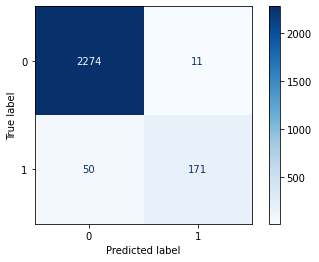

In [ ]:
print("accuracy=",accuracy_score(y_valid, predicted_pulsars_tree))
cm2=confusion_matrix(y_valid, predicted_pulsars_tree)
print(classification_report(y_valid, predicted_pulsars_tree))
disp = ConfusionMatrixDisplay(cm2).plot(cmap=plt.cm.Blues)

accuracy= 0.9804469273743017
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2285
         1.0       0.95      0.82      0.88       221

    accuracy                           0.98      2506
   macro avg       0.97      0.91      0.94      2506
weighted avg       0.98      0.98      0.98      2506



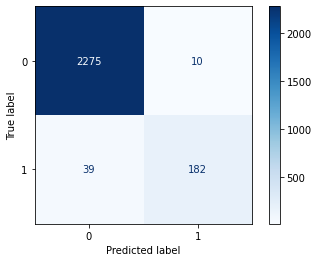

In [ ]:
model = RandomForestClassifier()
model.fit(imputed_X_train, y_train)
y_pred = model.predict(imputed_X_valid)
print("accuracy=",accuracy_score(y_valid, y_pred))
cm2_5=confusion_matrix(y_valid, y_pred)
print(classification_report(y_valid, y_pred))
disp = ConfusionMatrixDisplay(cm2_5).plot(cmap=plt.cm.Blues)

# Modelo Con Caracteristicas reducidas

In [ ]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model =  RandomForestClassifier(max_leaf_nodes=max_leaf_nodes, random_state=1)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [ ]:
for max_leaf_nodes in [2,5, 20,50,500]:
    my_mae_r = get_mae(max_leaf_nodes,reduced_X_train,reduced_X_valid,y_train,y_valid)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %f" %(max_leaf_nodes, my_mae_r))

Max leaf nodes: 2  		 Mean Absolute Error:  0.033121
Max leaf nodes: 5  		 Mean Absolute Error:  0.025938
Max leaf nodes: 20  		 Mean Absolute Error:  0.021149
Max leaf nodes: 50  		 Mean Absolute Error:  0.021548
Max leaf nodes: 500  		 Mean Absolute Error:  0.020750


In [ ]:
pulsar_model_reduced = RandomForestClassifier(max_leaf_nodes=500, random_state=1)

# Fit model
pulsar_model_reduced.fit(reduced_X_train, y_train)
predicted_pulsars_r = pulsar_model_reduced.predict(reduced_X_valid)
#calculations
predicted_pulsars_test=pulsar_model_reduced.predict(X_test_reduced)
pulsarstest = predicted_pulsars_test.tolist()
count = pulsarstest.count(1)
print('Count of pulsars:', count)
print("accuracy=",accuracy_score(y_valid, predicted_pulsars_r))
cm3=confusion_matrix(y_valid, predicted_pulsars_r)
disp = ConfusionMatrixDisplay(cm3).plot(cmap=plt.cm.Blues)
print(classification_report(y_valid, predicted_pulsars_r))

> # XGBoost

In [ ]:
model = XGBClassifier()
#nthread=-1??
model.fit(reduced_X_train, y_train)
y_pred = model.predict(reduced_X_valid)
print(accuracy_score(y_valid, y_pred))
cm3=confusion_matrix(y_valid, y_pred)
print(classification_report(y_valid, y_pred))
disp = ConfusionMatrixDisplay(cm3).plot(cmap=plt.cm.Blues)

In [ ]:
#data='../input/predicting-pulsar-starintermediate/pulsar_data_train.csv'

> # Cross-Validation

In cross-validation, we run our modeling process on different subsets of the data to get multiple measures of model quality.

For example, we could begin by dividing the data into 5 pieces, each 20% of the full dataset. In this case, we say that we have broken the data into 5 "folds".

![image.png](attachment:5da42c4c-b167-4670-934c-cc357286cf55.png)

Cross-validation gives a more accurate measure of model quality, which is especially important if you are making a lot of modeling decisions. However, it can take longer to run, because it estimates multiple models (one for each fold).

So, given these tradeoffs, when should you use each approach?

For small datasets, where extra computational burden isn't a big deal, you should run cross-validation.
For larger datasets, a single validation set is sufficient. Your code will run faster, and you may have enough data that there's little need to re-use some of it for holdout.
There's no simple threshold for what constitutes a large vs. small dataset. But if your model takes a couple minutes or less to run, it's probably worth switching to cross-validation.

Alternatively, you can run cross-validation and see if the scores for each experiment seem close. If each experiment yields the same results, a single validation set is probably sufficient.